In [33]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [34]:
# filename = "Data Requirements from RPPs.csv"
filename = "NETCCN Data Registry Definition.csv"
df = pd.read_csv(filename, encoding= 'unicode_escape')

In [35]:
df.head()

,Data Element ID,Data Content,Data Content Description,Class,Class Description,Element,Element Description,PHI,Data Structure [Applicable Standard(s)],Step/Phase #,Data Content Source
0,1.1.1,Patient Health Information,Information about a patient and their health h...,Data Input,Contains information about how the patient's h...,Input Method,Contains information about the method/source u...,NaN,NaN,2,NETCCN Phase 2 RPP
1,1.1.2,Patient Health Information,Information about a patient and their health h...,Data Input,Contains information about how the patient's h...,Input Language,The language used to input the patient informa...,NaN,"Request for Comment (RFC) 5646, Tags for Iden...",2,NETCCN Phase 2 RPP
2,1.1.3,Patient Health Information,Information about a patient and their health h...,Data Input,Contains information about how the patient's h...,Language Translation,Contains information about any language transl...,NaN,NaN,2,NETCCN Phase 2 RPP
3,1.2.1,Patient Health Information,Information about a patient and their health h...,Patient Health Surveys,Captures responses to patient health surveys /...,Patient Health Surveys,NaN,"May contain PHI (names, unique identifying num...",NaN,1,NETCCN Phase 1 MECs
4,1.3.1,Patient Health Information,Information about a patient and their health h...,Allergies and Intolerances,Represents harmful or undesirable physiologica...,Substance (Medication),NaN,NaN,"RxNorm, January 4, 2021 Full Release Update",1,USCDIv1 July 2020


In [36]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

There are 191 observations and 11 features in this dataset. 



In [37]:
df.columns

Index(['Data Element ID', 'Data Content', 'Data Content Description', 'Class',
       'Class Description', 'Element', 'Element Description', 'PHI',
       'Data Structure [Applicable Standard(s)]', 'Step/Phase #',
       'Data Content Source'],
      dtype='object')

## The following step is only necessary for the "NETCCN Data Registry Definition" file

In [38]:
df.rename(columns = {"Data Content Description": "Description"}, 
          inplace = True)

In [39]:
text = " ".join(descriptions for descriptions in df.Description)
print ("There are {} words in the combination of all descriptions.".format(len(text)))

There are 16877 words in the combination of all descriptions.


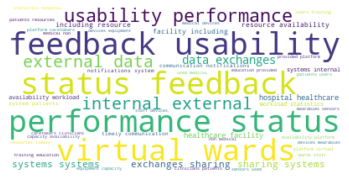

In [40]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Information", "patient", "health", "history", "care", "NETCCN", "utilization"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
wordcloud.to_file("descriptions.png")